In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
image = cv2.imread('train/1/Training_10371709.jpg')

In [3]:
image.shape

(48, 48, 3)

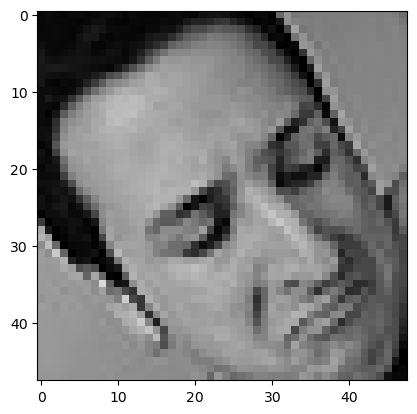

In [4]:
plt.imshow(image)

In [5]:
datadirect= "train/"

In [6]:
Classes= ['0', '1', '2', '3', '4', '5', '6']

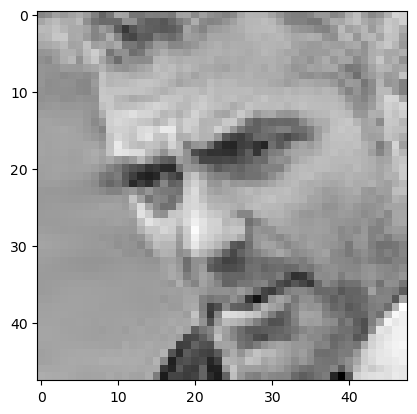

In [7]:
for cat in Classes:
    path=os.path.join(datadirect, cat)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

# Resizing the image for Transfer Learning on MobileNetV2

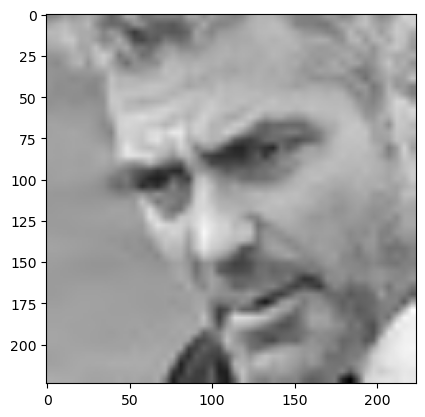

In [8]:
resized=cv2.resize(img_array,(224,224))
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
training_Data=[]
for cat in Classes:
    path=os.path.join(datadirect, cat)
    class_num=Classes.index(cat)
    for img in os.listdir(path):
        #try:
        img_array= cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array,(224,224))
        training_Data.append([new_array,class_num])
        #except Exception as e:
         #   pass

In [10]:
print(len(training_Data))

25627


In [11]:
training_Data[0]

[array([[[134, 134, 134],
         [134, 134, 134],
         [134, 134, 134],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],
 
        [[134, 134, 134],
         [134, 134, 134],
         [134, 134, 134],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],
 
        [[135, 135, 135],
         [135, 135, 135],
         [135, 135, 135],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],
 
        ...,
 
        [[173, 173, 173],
         [173, 173, 173],
         [173, 173, 173],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],
 
        [[173, 173, 173],
         [173, 173, 173],
         [173, 173, 173],
         ...,
         [230, 230, 230],
         [230, 230, 230],
         [230, 230, 230]],
 
        [[173, 173, 173],
         [173, 173, 173],
         [173, 173, 173],
         ...,
         [230, 230, 230],
  

In [12]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [13]:
train_data=np.array(training_Data)

In [14]:
train_data.shape

(25627, 2)

In [15]:
random.shuffle(training_Data)

# Converting to 4 dimension for MobileNetV3

In [16]:
X_train=[]
y_train=[]
for i, j in training_Data:
    X_train.append(i)
    y_train.append(j)
X_train=np.array(X_train).reshape(-1, 224, 224, 3)

In [17]:
y_train=np.array(y_train)

# Performing Transfer Learning

In [18]:
model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3))

In [19]:
model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 7, 7, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 7, 7, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 7, 7, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

Note:- MobileNetV3 has 1000 classes as output and we need just 7, hence we need to do some changes

In [20]:
our_input=model.layers[0].input
our_output=model.layers[-2].output #Here we are removing the last layer

In [21]:
our_output

<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'flatten')>

We observe that the output layer is now flatten_2

In [22]:
out_layer1 = tf.keras.layers.Dense(200, activation='relu')(our_output)

In [23]:
out_layer2=tf.keras.layers.Dense(50, activation='relu')(out_layer1)

In [24]:
final_layer= tf.keras.layers.Dense(7, activation='linear')(out_layer2)

In [25]:
final_layer


<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

# Assembling final model

In [26]:
final_model=tf.keras.Model(inputs=our_input, outputs=final_layer)

In [27]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 7, 7, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 7, 7, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 7, 7, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

In [28]:
final_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [31]:
final_model.fit(X_train,y_train, epochs=6)

Epoch 1/6
801/801 [==============================] - 1445s 2s/step - loss: 0.5762
Epoch 2/6
801/801 [==============================] - 1466s 2s/step - loss: 0.5104
Epoch 3/6
801/801 [==============================] - 1447s 2s/step - loss: 0.4530
Epoch 4/6
801/801 [==============================] - 1461s 2s/step - loss: 0.4137
Epoch 5/6
801/801 [==============================] - 1451s 2s/step - loss: 0.3586
Epoch 6/6
801/801 [==============================] - 2150s 3s/step - loss: 0.3204


In [34]:
final_model.save('model_for_frecog')

INFO:tensorflow:Assets written to: model_for_frecog\assets


INFO:tensorflow:Assets written to: model_for_frecog\assets


In [35]:
final_model=tf.keras.models.load_model('model_for_frecog')

# Getting test data

In [36]:
datadirect= "test/"
test_Data=[]
for cat in Classes:
    path=os.path.join(datadirect, cat)
    class_num=Classes.index(cat)
    for img in os.listdir(path):
        #try:
        img_array= cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array,(224,224))
        test_Data.append([new_array,class_num])
        #except Exception as e:
         #   pass

In [37]:
random.shuffle(test_Data)

In [38]:
x_test=[]
y_test=[]
for i, j in test_Data:
    x_test.append(i)
    y_test.append(j)
x_test=np.array(x_test).reshape(-1, 224, 224, 3)